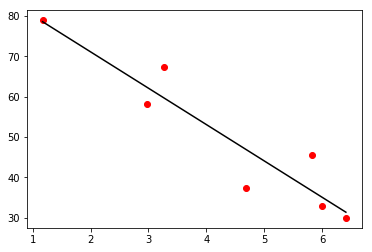

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [135]:
#Linear Regression
#example taken from a blog: https://www.springboard.com/blog/linear-regression-in-python-a-tutorial/
#y= a+bX
# where a , b are coefficients
# and y : Test Score (Dependent Variable)
# and x: Explanatory Variable ( Independent Variable)

import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

data = pd.read_csv('lsd.csv')
data
X= data['Tissue Concentration'].values[:,np.newaxis]
y = data['Test Score'].values
model= LinearRegression()
result  = model.fit(X,y)
plt.scatter(X,y, color='r')
plt.plot(X,model.predict(X), color='k')
plt.show()


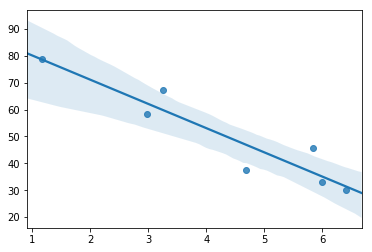

In [15]:
sns.regplot(X, y)

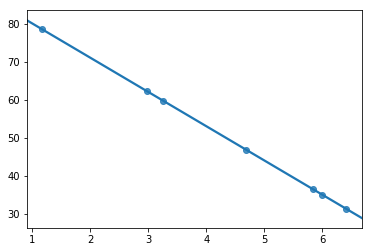

In [23]:
sns.regplot(X,model.predict(X))

/home/ashu6811/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ashu6811/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


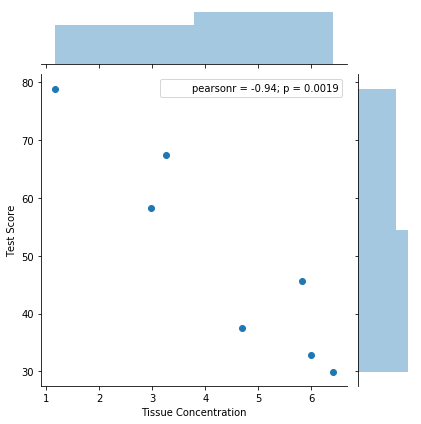

In [25]:
sns.jointplot('Tissue Concentration', 'Test Score', data = data)

In [29]:

#Scikit-learn is a good way to plot a linear regression 
#but if we are considering linear regression for modelling purposes 
#then we need to know the importance of variables( significance) with respect to the hypothesis.
# sklearn -> to plot linear regression
# statsmodels -> for modelling linear regression

# Let us take a large data set for linear regression model and also check accuracy of the model by splitting the data set
# into training and testing dataset
# Also we will try to increase the accuracy through feature selection ( using correlation and p values)


In [80]:
#Example 2 https://www.edvancer.in/step-step-guide-to-execute-linear-regression-python/

df = pd.read_csv('boston.csv')
df_attr = list(df)
print(df_attr)
last=df_attr.pop()
print(df_attr)
df_x =df[df_attr]
df_x.head()
df_y=df[last]
print('X shape: ',df_x.shape)
print('y shape: ',df_y.shape)


['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT', 'MV']
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT']
X shape:  (506, 13)
y shape:  (506,)


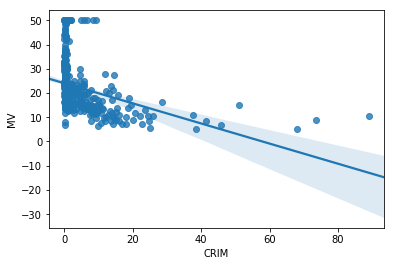

In [86]:
sns.regplot(df_x[df_attr[0]],df_y) #we can regression plot for per attribute

In [92]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state = 4)
print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

x_train shape (404, 13)
x_test shape (102, 13)
y_train shape (404,)
y_test shape (102,)


MSE(Mean Square Error) 25.41958765886445
Intercept:  35.55487704752842
Coefficient:  [-1.15966452e-01  4.71249218e-02  8.25985188e-03  3.23404536e+00
 -1.66865921e+01  3.88410633e+00 -1.08974446e-02 -1.54129534e+00
  2.93208339e-01 -1.34059378e-02 -9.06296448e-01  8.80823442e-03
 -4.57723863e-01]
Variance:  0.7263451449827205


AttributeError: 'LinearRegression' object has no attribute 'params'

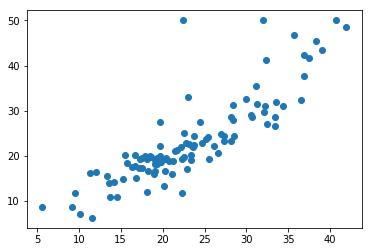

In [172]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
result_sk = LR_model.fit(x_train,y_train)
y_predict = LR_model.predict(x_test)

#intercept value, mean squared error, coefficients, and the variance score.
MSE = np.mean((y_predit-y_test)**2)
print('MSE(Mean Square Error)',MSE)
print('Intercept: ',result_sk.intercept_)
print('Coefficient: ', result_sk.coef_)   # result_OLS.params  for statsmodel.api
print('Variance: ', result_sk.score(x_test, y_test))

# plot on graph using matplotlib 
plt.scatter(y_predict,y_test)
#plt.plot(y_predict, y_test) # cannot work as we have randomly selected the rows for training and testing


0    0
1    0
2    0
3    0
dtype: int64
(102,)


Text(0,0.5,'Y_predict - Y_test')

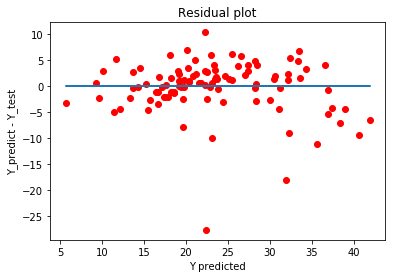

In [267]:
#Residual chart
plt.scatter(y_predict, y_predict-y_test , c='r')
i=0
X = pd.Series([])

while(i<102):
    X[i]= 0
    i=i+1
print(X.head(4))
print(X.shape)

plt.plot(y_predict, X)
plt.title('Residual plot')
plt.xlabel('Y predicted')
plt.ylabel('Y_predict - Y_test')

Text(0.5,0,'Y_predict')

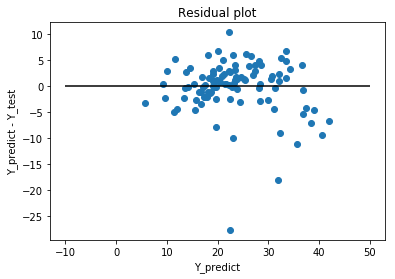

In [268]:
#Alternate way to draw residual graph
plt.scatter(y_predict,y_predict-y_test)
plt.hlines(y=0, xmin= -10, xmax=50) 
plt.title('Residual plot') 
plt.ylabel('Y_predict - Y_test')
plt.xlabel('Y_predict')

#We can see a funnel like shape in the plot.
#This shape indicates Heteroskedasticity. 
#The presence of non-constant variance in the error terms results in heteroskedasticity. 
#We can clearly see that the variance of error terms(residuals) is not constant.
#Generally, non-constant variance arises in presence of outliers or extreme leverage values.
#These values get too much weight, thereby disproportionately influencing the model’s performance. 

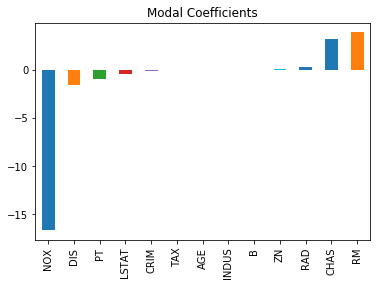

In [273]:
#Regularization Basics
predictors = x_train.columns 
coef = Series(result_sk.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

#high magnitude coefficients are treated and their weightage in LR is reduced. 
#therefore Logistic Regression is used to regularize the model 
#and hence reduce the variance is complex models having low bias



In [140]:
#Select only the important variables for the model.
#Scikit-learn is a good way to plot a linear regression 
#but if we are considering linear regression for modelling purposes then we need to know the importance of variables( significance) with respect to the hypothesis.
#To do this, we need to calculate the p value for each variable and if it is less than the desired cutoff( 0.05 is the general cut off for 95% significance) 
#then we can say with confidence that a variable is significant. 
#We can calculate the p-value using another library called ‘statsmodels’.



In [145]:
# Statsmodels
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
LR_OLSmodel = sm.OLS(y_train,x_train)
result_OLS = LR_OLSmodel.fit()
result_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     712.2
Date:                Sat, 23 Jun 2018   Prob (F-statistic):          7.58e-263
Time:                        13:13:56   Log-Likelihood:                -1210.7
No. Observations:                 404   AIC:                             2447.
Df Residuals:                     391   BIC:                             2499.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1096      0.039     -2.815      0.005      -0.186      -0.033
ZN             0.0485      0.016      2.956      0.003       0.016       0.081
INDUS         -0.0236      0.073     -0.323      0.747      -0.167       0.120
CHAS           2.9884      1.061      2.815      0.005       0.901       5.075
NOX           -2.1495      3.660     -0.587      0.557      -9.346       5.047
RM             5.9635      0.339     17.600      0.000       5.297       6.630
AGE           -0.0170      0.015     -1.099      0.272      -0.047       0.013
DIS           -1.0283      0.220     -4.667      0.000      -1.461      -0.595
RAD            0.1680      0.075      2.255      0.025       0.022       0.315
TAX           -0.0105      0.004     -2.371      0.018      -0.019      -0.002
PT            -0.3750      0.124     -3.017      0.003      -0.619      -0.131
B              0.0142      0.003      4.700      0.000       0.008       0.020
LSTAT         -0.3453      0.057     -6.107      0.000      -0.456      -0.234
==============================================================================
Omnibus:                      151.874   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              866.552
Skew:                           1.497   Prob(JB):                    6.77e-189
Kurtosis:                       9.521   Cond. No.                     8.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
#Dealing with p-values
#We can drop few variables 
#and select only those that have p values < 0.5 
#and then we can check improvement in the model.

# remove AGE , NOX and INDUS
LR_OLSmodel = sm.OLS(y_train,x_train[['CRIM','ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PT','B','LSTAT']])
result_OLS_p = LR_OLSmodel.fit()
result_OLS_p.summary()

#Judge by AIC
#A general approach to compare two different models is AIC( Akaike Information Criteria) 
#and the model with minimum AIC is the best one.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     926.9
Date:                Sat, 23 Jun 2018   Prob (F-statistic):          9.80e-267
Time:                        13:21:26   Log-Likelihood:                -1212.0
No. Observations:                 404   AIC:                             2444.
Df Residuals:                     394   BIC:                             2484.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1059      0.039     -2.731      0.007      -0.182      -0.030
ZN             0.0522      0.016      3.235      0.001       0.020       0.084
CHAS           2.7720      1.046      2.650      0.008       0.716       4.828
RM             5.7139      0.270     21.127      0.000       5.182       6.246
DIS           -0.8546      0.188     -4.545      0.000      -1.224      -0.485
RAD            0.1858      0.071      2.623      0.009       0.047       0.325
TAX           -0.0125      0.004     -3.419      0.001      -0.020      -0.005
PT            -0.3938      0.123     -3.196      0.002      -0.636      -0.152
B              0.0137      0.003      4.607      0.000       0.008       0.020
LSTAT         -0.3911      0.048     -8.143      0.000      -0.486      -0.297
==============================================================================
Omnibus:                      145.578   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.495
Skew:                           1.454   Prob(JB):                    5.95e-167
Kurtosis:                       9.084   Cond. No.                     2.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

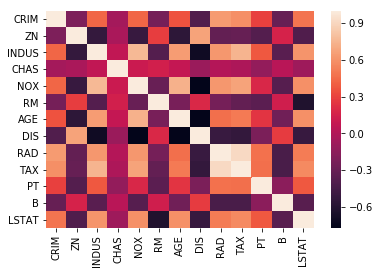

In [154]:
#Dealing with multicollinearity
#Multicollinearity is problem that you can run into when you’re fitting a regression model. 
#Simply put, multicollinearity is when two or more independent variables in a regression are highly related to one another, 
#such that they do not provide unique or independent information to the regression.

#We can check multicollinearity using this command: corr(method = “name of method”). 
#I am going to make a correlation plot to see which parameters have multicollinearity issue.

import seaborn as sns
corr_df = x_train.corr()
sns.heatmap(corr_df)
# As DIS is highly negatively correlated to most of the variables.. therefore remove it


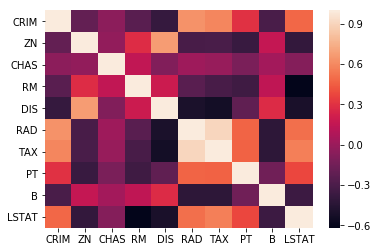

In [156]:
corr_df_p = x_train[['CRIM','ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PT','B','LSTAT']].corr()
sns.heatmap(corr_df_p)


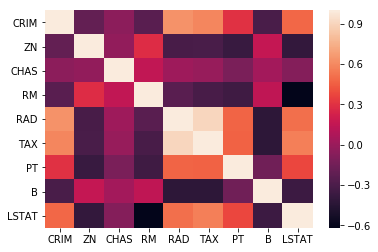

In [158]:
corr_df_p = x_train[['CRIM','ZN', 'CHAS', 'RM', 'RAD', 'TAX', 'PT','B','LSTAT']].corr()
sns.heatmap(corr_df_p)
# it is much better independency shown in the map


In [160]:
LR_OLSmodel = sm.OLS(y_train,x_train[['CRIM','ZN', 'CHAS', 'RM', 'RAD', 'TAX', 'PT','B','LSTAT']])
result_OLS_p = LR_OLSmodel.fit()
result_OLS_p.summary()
#AIC increases hence we revert back to our old model and consider DIS

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MV   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     978.9
Date:                Sat, 23 Jun 2018   Prob (F-statistic):          7.11e-264
Time:                        14:13:47   Log-Likelihood:                -1222.3
No. Observations:                 404   AIC:                             2463.
Df Residuals:                     395   BIC:                             2499.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0884      0.040     -2.235      0.026      -0.166      -0.011
ZN             0.0034      0.012      0.276      0.783      -0.021       0.028
CHAS           3.1533      1.068      2.952      0.003       1.053       5.253
RM             5.7618      0.277     20.809      0.000       5.217       6.306
RAD            0.1944      0.073      2.680      0.008       0.052       0.337
TAX           -0.0094      0.004     -2.551      0.011      -0.017      -0.002
PT            -0.6462      0.113     -5.735      0.000      -0.868      -0.425
B              0.0130      0.003      4.275      0.000       0.007       0.019
LSTAT         -0.3550      0.049     -7.315      0.000      -0.450      -0.260
==============================================================================
Omnibus:                      158.389   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              848.099
Skew:                           1.598   Prob(JB):                    6.88e-185
Kurtosis:                       9.338   Cond. No.                     2.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
#Final conclusion
LR_OLSmodel = sm.OLS(y_train,x_train[['CRIM','ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PT','B','LSTAT']])
result_OLS_p = LR_OLSmodel.fit()
print(result_OLS_p.params)
#y_predict_OLS = LR_
#MSE_OLS= 

CRIM    -0.105902
ZN       0.052170
CHAS     2.772011
RM       5.713886
DIS     -0.854553
RAD      0.185758
TAX     -0.012522
PT      -0.393790
B        0.013744
LSTAT   -0.391083
dtype: float64


192    32.019341
138    15.986748
251    25.015331
13     20.756263
256    37.204719
299    31.059315
180    35.630107
92     27.565379
219    28.620164
152    19.986523
214    11.016330
191    28.790309
276    35.895190
184    20.496163
163    42.751572
421    18.393689
490     4.215167
61     19.269609
76     21.439401
397    16.405736
238    26.846846
302    26.904920
323    18.951454
459    19.573657
166    37.066553
423    11.487665
33     15.600297
394    17.924657
225    41.553809
24     17.684141
         ...    
149    16.928102
21     19.179837
183    29.421467
0      28.973751
387     5.987002
52     26.944105
126    15.302579
294    21.834994
44     21.983537
434    15.713603
164    22.113793
500    20.787443
313    24.994269
503    29.748363
311    25.447374
94     25.581644
109    20.574819
359    20.907087
252    26.851864
58     22.580417
393    20.626136
306    35.661675
456    12.319929
87     24.074053
360    24.189869
385     8.722774
197    31.323777
439    14.2756

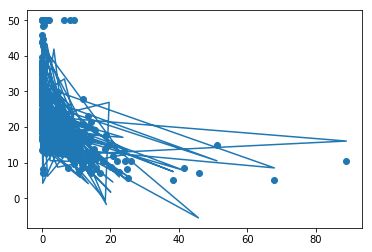

In [196]:
plt.scatter(x_train['CRIM'], y_train)
plt.plot(x_train['CRIM'],result_OLS_p.fittedvalues ) # random caused the graph hotch potch
x_train['CRIM']
result_OLS_p.fittedvalues

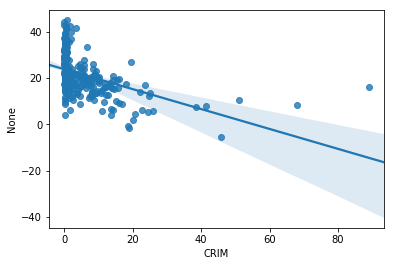

In [197]:
sns.regplot(x_train['CRIM'],result_OLS_p.fittedvalues )

In [198]:
# importing basic libraries
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
#import test and train file 
train = pd.read_csv('Train.csv')
test = pd.read_csv('test.csv') 
# importing linear regressionfrom sklearn 
from sklearn.linear_model import LinearRegression
lreg = LinearRegression() 
#splitting into training and cv for cross validation 
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales) 
#training the model
lreg.fit(x_train,y_train) 
#predicting on cv 
pred = lreg.predict(x_cv) 
#calculating mse 
mse = np.mean((pred - y_cv)**2)

 # calculating coefficients 
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_) 

FileNotFoundError: File b'Train.csv' does not exist

In [ ]:
#R-Square
#The value of R-square is always between 0 and 1, 
#where 0 means that the model does not model explain any variability in the target variable (Y) 
#and 1 meaning it explains full variability in the target variable.

lreg.score(x_cv,y_cv)

#drawback of R-square: The only drawback of R2 is that if new predictors (X) are added to our model,
                        #R2 only increases or remains constant but it never decreases.

In [ ]:
#Adjusted R-square



In [274]:
#GOING DEEPER INTO REGRESSION
#Going Deeper into Regression Analysis with Assumptions, Plots & Solutions
#https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/


In [ ]:
#Assumptions of parameters

   
    #1) There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). 
        #A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹.
        #An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
   
    #2) There should be no correlation between the residual (error) terms. 
        #Absence of this phenomenon is known as Autocorrelation.
   
    #3) The independent variables should not be correlated.
        #Absence of this phenomenon is known as multicollinearity.
    
    #4) The error terms must have constant variance. This phenomenon is known as homoskedasticity. 
        #The presence of non-constant variance is referred to heteroskedasticity.
   
    #5) The error terms must be normally distributed.


In [ ]:
# What if these assumptions get violated ?
#NOTE: * means the technique which is most priotized among others
#1. Linear and Additive: 
    #a)* residual vs fitted value plots

#2. Autocorrelation: 
    #a)* Durbin – Watson (DW) statistic: It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 
        #0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation.
    #b) residual vs time plot: you can see residual vs time plot and look for the seasonal or correlated pattern in residual values.

#3. Multicollinearity: 
    #a) scatter plot: You can use scatter plot to visualize correlation effect among variables.
    #b) VIF factor:  VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity.
    #c)* correlation table 

#4. Heteroskedasticity:
    #a)* residual vs fitted values plot: If heteroskedasticity exists, the plot would exhibit a funnel shape pattern
    #b) Breusch-Pagan / Cook – Weisberg test or White general test
    
#5. Normal Distribution of error terms:
    #a)* QQ plot:
    #b) Kolmogorov-Smirnov test
    #c) Shapiro-Wilk test

In [ ]:
#Interpretation of Regression Plots
    #1. Residual vs Fitted Values
    #Check:
    #There are two major things which you should learn:
    #a) If there exist any pattern (may be, a parabolic shape) in this plot, consider it as signs of non-linearity in the data.
        #It means that the model doesn’t capture non-linear effects.
    #b) If a funnel shape is evident in the plot, consider it as the signs of non constant variance i.e. heteroskedasticity.
    
    #Solution: 
    #a)To overcome the issue of non-linearity, you can do a non linear transformation of predictors 
        #such as log (X), √X or X² transform the dependent variable. 
    #b)To overcome heteroskedasticity, a possible way is to transform the response variable such as log(Y) or √Y.
        #Also, you can use weighted least square method to tackle heteroskedasticity.
    
    
    #2. Normal Q-Q Plot (quantile-quantile plot)
    #Check:
    #a) If yes, the plot would show fairly straight line. 
        #Absence of normality in the errors can be seen with deviation in the straight line.
    
    #Solution:
    #a) If the errors are not normally distributed, 
        #non – linear transformation of the variables (response or predictors) can bring improvement in the model.
    
    
    #3. Scale Location Plot
    #Check: should be similar to residual vs fitted graph otherwise there is heteroskedanticity 
    
    #Solution: same as in first plot
    
    
    #4. Residuals vs Leverage Plot
    #Check:
    #a) Cook’s Distance plot: Cook’s distance attempts to identify the points which have more influence than other points. 
        #Such influential points tends to have a sizable impact of the regression line. 
        #In other words, adding or removing such points from the model can completely change the model statistics.
    #Solution:
    #a)  For influential observations which are nothing but outliers, if not many, you can remove those rows. 
        #Alternatively, you can scale down the outlier observation with maximum value in data or else treat those values as missing values.

Text(0,0.5,'Residuals')

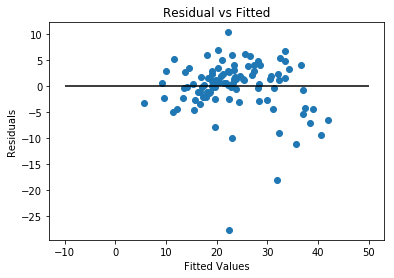

In [279]:
#1. Residual vs Fitted Values
plt.scatter(y_predict, y_predict-y_test)
plt.hlines(y=0,xmin=-10,xmax=50)
plt.title('Residual vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
#Conclusions:
    #linearity Exists
    #heteroskedasticity Doesn't significantly exists
    

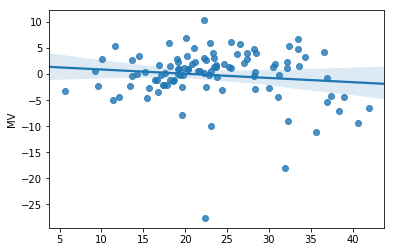

In [294]:
sns.regplot(y_predict, y_predict-y_test)

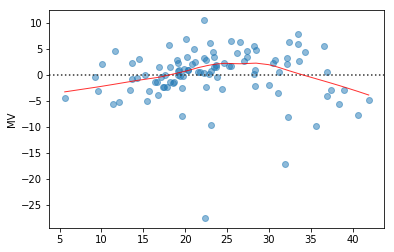

In [300]:
#Alternate and Best way to represent the residual vs fitted graph using seaborn
sns.residplot(y_predict,y_predict-y_test, lowess=True,scatter_kws={'alpha': 0.5},line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

((array([-2.46910766, -2.1336363 , -1.93974661, -1.79944435, -1.68760881,
         -1.59360615, -1.5118886 , -1.43917788, -1.37336772, -1.31302066,
         -1.2571097 , -1.20487427, -1.1557345 , -1.10923759, -1.06502277,
         -1.02279759, -0.9823215 , -0.943394  , -0.90584606, -0.86953373,
         -0.83433329, -0.80013752, -0.76685278, -0.73439673, -0.7026965 ,
         -0.67168722, -0.64131082, -0.611515  , -0.58225249, -0.55348033,
         -0.52515927, -0.49725335, -0.46972944, -0.44255691, -0.41570731,
         -0.38915415, -0.36287262, -0.3368394 , -0.31103252, -0.28543117,
         -0.26001558, -0.23476687, -0.20966696, -0.18469848, -0.15984463,
         -0.13508914, -0.11041618, -0.08581026, -0.06125619, -0.03673901,
         -0.01224389,  0.01224389,  0.03673901,  0.06125619,  0.08581026,
          0.11041618,  0.13508914,  0.15984463,  0.18469848,  0.20966696,
          0.23476687,  0.26001558,  0.28543117,  0.31103252,  0.3368394 ,
          0.36287262,  0.38915415,  0.

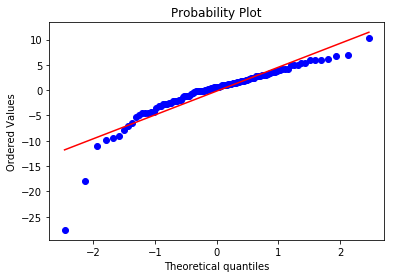

In [292]:
#2. Normal Q-Q Plot
import scipy.stats as stats
import matplotlib.pylab as pylab
stats.probplot(y_predict-y_test, plot=pylab)

#Conclusion:
    #Residual errors are normaly distributed

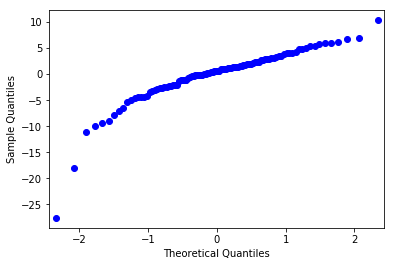

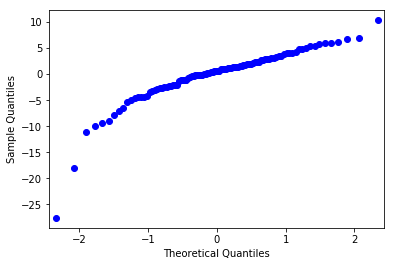

In [361]:
# alternate to draw qq plot using statsmodel.api library 

sm.qqplot(y_predict-y_test) 


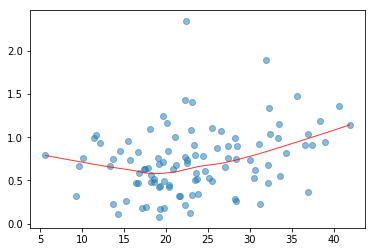

In [376]:
#3. Scale Location Plot
import scipy as scipy
# absolute squared normalized residuals
model_norm_residuals = [(num)/scipy.std(y_predict-y_test) for num in y_predict-y_test]
#model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_norm_residuals_abs_sqrt


plt.scatter(y_predict, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(y_predict, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

#Conclusions:
    #heteroskedasticity Doesn't significantly exists

In [ ]:
#4. Residuals vs Leverage Plot
 #NOTE: this couldn't be found by scikit learn library. Therefore, we have to use statsmodel library for 4th plot
    #All these 4 plots are easy to construct in R
    
# absolute residuals
model_abs_resid = np.abs(y_predict - y_test)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})